# Shopify Data Science Internship Challenge

Please see the answers to the challenge questions at the end of this notebook. Thank you. 

### Libriaries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime
import seaborn as sns

### Import Data

In [33]:
shopify = pd.read_csv('shopify_internchallenge.csv')
shopify

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


### EDA

In [34]:
shopify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [43]:
shopify['created_at'] = pd.to_datetime(shopify['created_at'])

In [44]:
shopify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


Average order value (AOV) is the average amount of money spent on each order placed on an ecommerce store. In order to calculate average order value, businesses divide total revenue by the total number of orders over a given period of time.
The higher the average order value, the more profitable the business.

In [35]:
# total revenue
total_revenue = shopify['order_amount'].sum()
print(total_revenue)
AOV = total_revenue / 5000
AOV

15725640


3145.128

In [36]:
shopify['order_amount'].mean()

3145.128

In [37]:
shopify['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

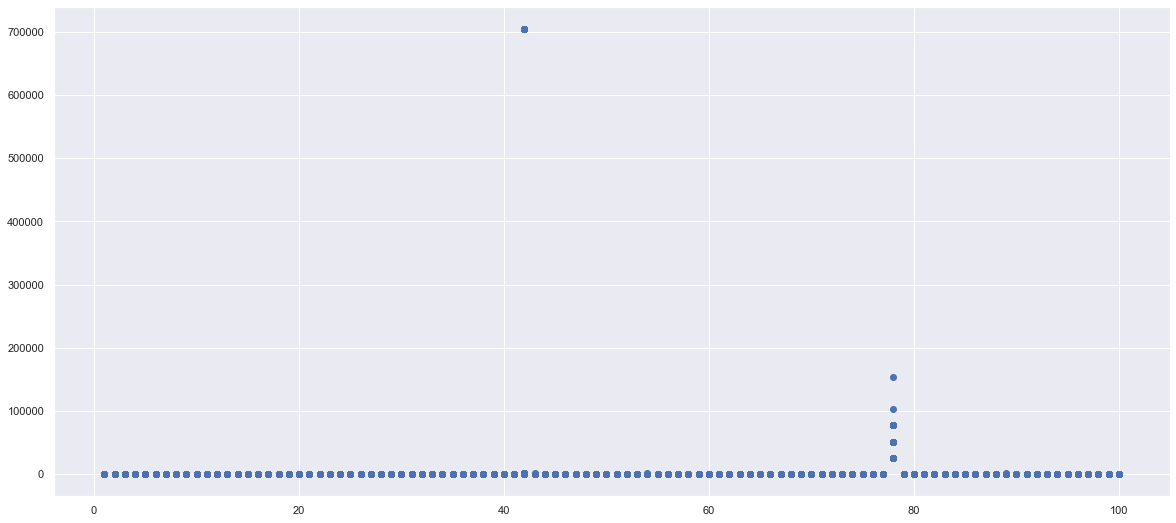

In [38]:
# scatter plot
plt.figure(figsize=(20, 9))
plt.scatter(shopify['shop_id'], shopify['order_amount'])
plt.show()

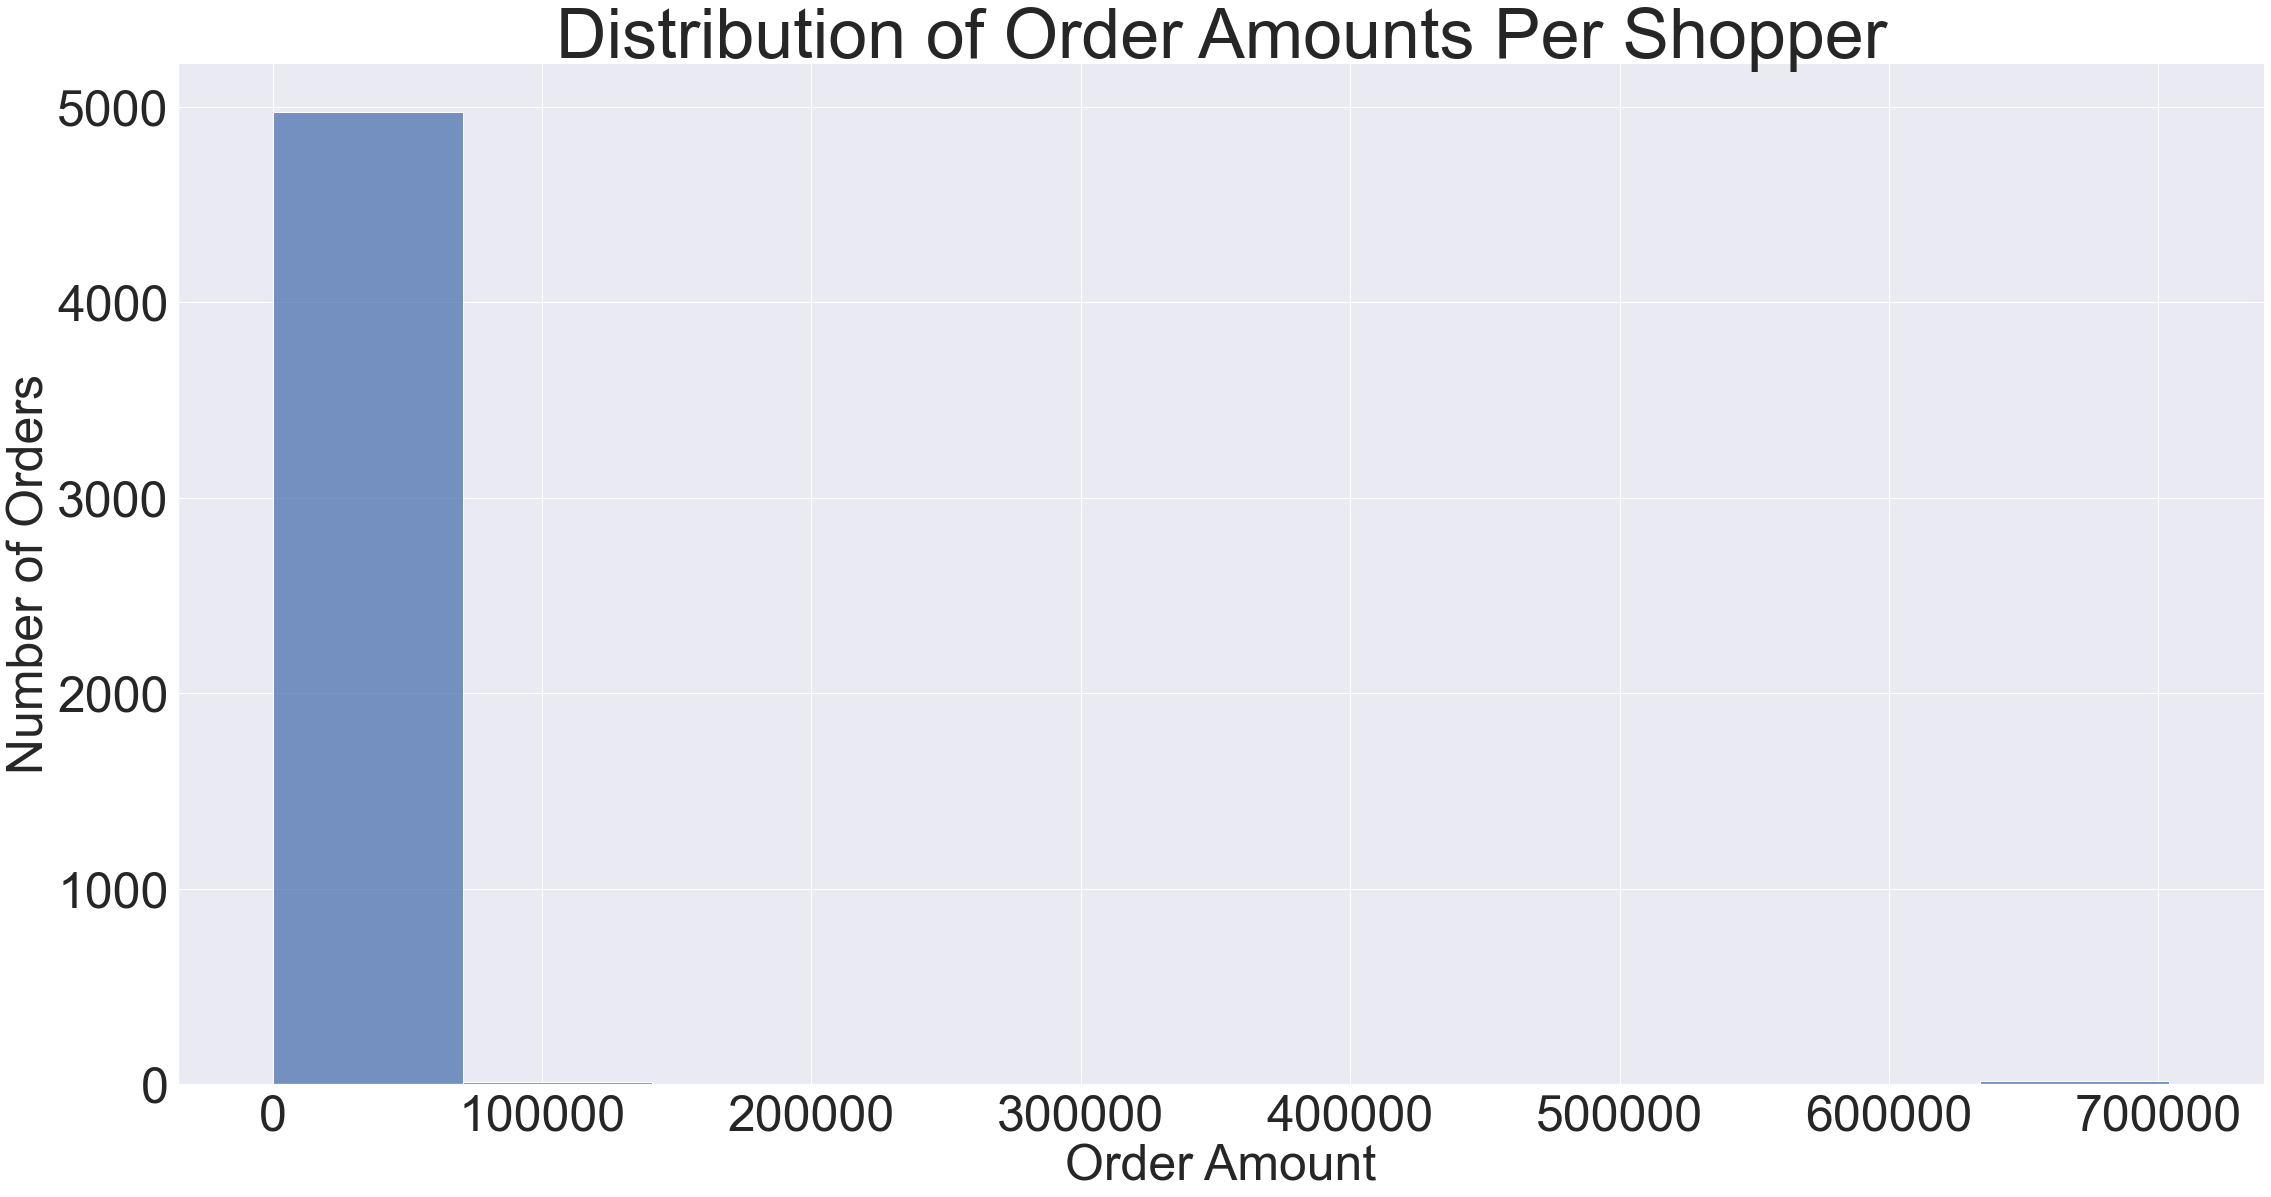

In [40]:
sns.set()
fig=sns.displot(data=shopify, x='order_amount',bins=10, height=15, aspect=2)
plt.xlabel("Order Amount", fontsize = 50)
plt.xticks(fontsize=50)
plt.ylabel('Number of Orders', fontsize = 50)
plt.yticks(fontsize=50)
plt.title("Distribution of Order Amounts Per Shopper", fontsize = 70);

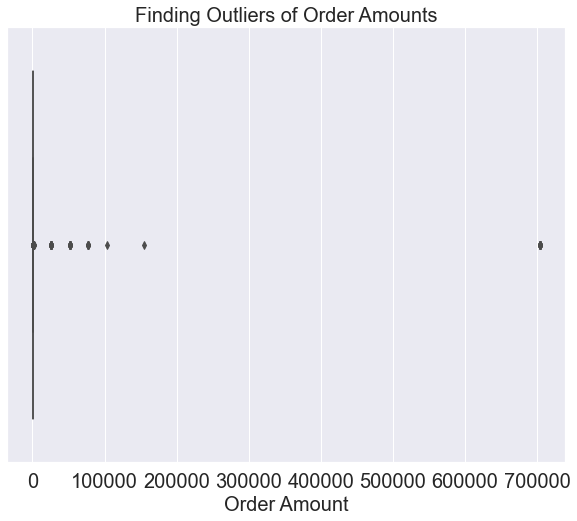

In [41]:
# Boxplot
sns.set()
fig=plt.figure(figsize=(10, 8))
sns.boxplot(data=shopify, x='order_amount')
plt.xlabel("Order Amount", fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Finding Outliers of Order Amounts", fontsize = 20);

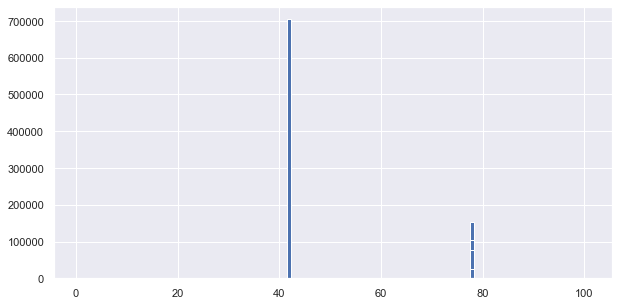

In [74]:
#Barplot
plt.figure(figsize=(10, 5))
plt.bar(shopify['shop_id'], shopify['order_amount'])
plt.show()

In [57]:
df1 = shopify.sort_values(by='order_amount', ascending=False).head(60)
df1

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 04:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 04:00:00


In [58]:
df1.sort_values(by='created_at')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4311,4312,78,960,51450,2,debit,2017-03-01 03:02:10
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
4412,4413,78,756,51450,2,debit,2017-03-02 04:13:39
4040,4041,78,852,25725,1,cash,2017-03-02 14:31:12
2821,2822,78,814,51450,2,cash,2017-03-02 17:13:25
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
2492,2493,78,834,102900,4,debit,2017-03-04 04:37:34
4715,4716,78,818,77175,3,debit,2017-03-05 05:10:44
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00


In [62]:
df1['shop_id'].value_counts()

78    43
42    17
Name: shop_id, dtype: int64

### Answers to Challenge's Questions

### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data
I don't think there is anything wrong with our calculation, it just doesn't tell us much. Based on the right schewed distribution, the mean is getting pulled far right and that's because one shop is selling more of their shoes at a way higher price (2000 units periodically for 704,000). I'd say the medium would be a better presentation (284) of the AOV. This echoes the world wealth distribution, where the top 0.1% has the highest income, where it makes more sense to look at medium income than the average income.

Hence, instead of taking the average order value, I'd recommend to take the medium order value instead.

### b. What metric would you report for this dataset?
- If we are looking at all the stores, we should use the medium.
- If we are looking at each individual store, we should use average order amount by store.
    - In addition, we could also get the unit price by dividing total_items / order_amount 

### c. What is its value?
- 50 percentile at $284

## SQL Questions

### a. How many orders were shipped by Speedy Express in total?
54

SELECT count(OrderID) 
FROM Orders
WHERE ShipperID = 1;

### b. What is the last name of the employee with the most orders?

The last name of the employee with the most orders is Peacock.

SELECT EmployeeID, count(*) as NUM
FROM Orders
GROUP BY EmployeeID;

SELECT * FROM Employees
WHERE EmployeeID = 4;

### c. What product was ordered the most by customers in Germany?
Boston Crab Meat (160) was ordered the most by customers in Germany.

SELECT ProductName, sum(Quantity) as Sum
FROM Customers
JOIN Orders
ON Customers.CustomerID = Orders.CustomerID
JOIN OrderDetails
ON Orders.OrderID = OrderDetails.OrderID
JOIN Products
ON OrderDetails.ProductID = Products.ProductID
WHERE Country = 'Germany'
GROUP BY ProductName
ORDER BY Sum DESC;